### Project: Wrangling and Analyze Data


​

In [1]:
import pandas as pd
import numpy as np
import requests 
import tweepy
from timeit import default_timer as timer
from tweepy import OAuthHandler
import json

### Data Gathering
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv("twitter_archive_enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

Os library is used to make a directory folder

In [4]:
import os
# Make directory if it doesn't already exist
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

image-prediction.tsv is save into image_prediction variable

In [7]:
image_predictions = pd.read_csv("image-predictions.tsv",sep="\t")

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)


# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


tweet-json.txt is run line by line in df_list

In [10]:
df_list= []

with open('tweet-json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data = json.loads(line)
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
    
        # Appending the list of columns to df_list
        df_list.append({'tweet_id' : tweet_id, 
                    'date_created' : created_at, 
                    'favorite_count' : favorite_count, 
                    'retweet_count' : retweet_count})
        
tweeter_api_df =  pd.DataFrame(df_list, columns = ['tweet_id', 'date_created',
                        'favorite_count',
                        'retweet_count'])
df_list
tweeter_api_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [11]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [13]:
image_predictions.jpg_url.sample(n=10)


219       https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg
2021      https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg
1903      https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg
968       https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg
460       https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg
1920      https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg
185       https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg
1837      https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg
1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1501      https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg
Name: jpg_url, dtype: object

In [14]:
df_archive.name.nunique()

957

In [15]:
df_archive.text.sample(n=10)

2269    This a Norwegian Pewterschmidt named Tickles. ...
489     This is Chubbs. He dug a hole and now he's stu...
659     Say hello to Levi. He's a Madagascan Butterbop...
483     This is Cooper. Someone attacked him with a sh...
432     Meet Sunny. He can take down a polar bear in o...
1925    This is Earl. Earl is lost. Someone help Earl....
1607    Meet Brooks. He's confused by the almighty bal...
895     RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...
553     This is Bo. He's going to make me cry. 13/10 p...
255     This is Margo. She just dug pup a massive hole...
Name: text, dtype: object

In [16]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
tweeter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   date_created    2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
    1. All retweets are remove from df dataset
    2. drop retweet columns in "df_archived1" and other irrelevant columns
    3. Clean rating_denominator table (i.e remove rating not equal to 10)
    4. Remove outliners in rating_numerator table( i.e rating higher than 50)
    5. The name column has many invalid values like , a, an, the. They are replace with "None".
    6. Capitalize all dog names image_prediction1 table
    7. Tweet_id colums is changed from int to object type
    8. drop nan values in df_arrchive1 dataset

### Tidiness issues
1. join multiple dog stages columns into a column 

2. merge the 3 dataframes together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# making a copy of each datasets
df_archive1 = df_archive.copy()
image_predictions1 = image_predictions.copy()
tweeter_api_df1 = tweeter_api_df.copy()


### Issue #1:

Define: 
        1)     Removed all retweets in retweet columns
        2)    Drooped retweet columns


Code

In [22]:
df_archive1 = df_archive1.query('retweeted_status_id.isna()')

### Test

In [23]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

code

In [24]:
#Removed all retweets in retweet columns

df_archive1.drop(columns= ['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

test

In [25]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue #2:

Define 

    1) Clean rating_denominator table (i.e remove rating not equal to 10)

    2) Remove outliners in rating_numerator table( i.e rating higher than 50)
    3) droping in_reply_to_status_id column in df_archive1 dataset
    4) droping in_reply_to_user_id  column in df_archive1 dataset

Code¶

In [26]:
#remove rating not equal to 10
df_archive1 = df_archive1.query('rating_denominator == 10')

#### Test

In [27]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2153 non-null   int64  
 1   in_reply_to_status_id  73 non-null     float64
 2   in_reply_to_user_id    73 non-null     float64
 3   timestamp              2153 non-null   object 
 4   source                 2153 non-null   object 
 5   text                   2153 non-null   object 
 6   expanded_urls          2099 non-null   object 
 7   rating_numerator       2153 non-null   int64  
 8   rating_denominator     2153 non-null   int64  
 9   name                   2153 non-null   object 
 10  doggo                  2153 non-null   object 
 11  floofer                2153 non-null   object 
 12  pupper                 2153 non-null   object 
 13  puppo                  2153 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 252.3+ 

code

In [28]:
# remove rating higher than 50
df_archive1 = df_archive1.query('rating_numerator < 50')

test

In [29]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2147 non-null   int64  
 1   in_reply_to_status_id  70 non-null     float64
 2   in_reply_to_user_id    70 non-null     float64
 3   timestamp              2147 non-null   object 
 4   source                 2147 non-null   object 
 5   text                   2147 non-null   object 
 6   expanded_urls          2096 non-null   object 
 7   rating_numerator       2147 non-null   int64  
 8   rating_denominator     2147 non-null   int64  
 9   name                   2147 non-null   object 
 10  doggo                  2147 non-null   object 
 11  floofer                2147 non-null   object 
 12  pupper                 2147 non-null   object 
 13  puppo                  2147 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 251.6+ 

code

In [30]:
# dropped in_reply_to_status_id column in df_archive1 dataset
df_archive1.drop(columns='in_reply_to_status_id', inplace=True)

test

In [31]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2147 non-null   int64  
 1   in_reply_to_user_id  70 non-null     float64
 2   timestamp            2147 non-null   object 
 3   source               2147 non-null   object 
 4   text                 2147 non-null   object 
 5   expanded_urls        2096 non-null   object 
 6   rating_numerator     2147 non-null   int64  
 7   rating_denominator   2147 non-null   int64  
 8   name                 2147 non-null   object 
 9   doggo                2147 non-null   object 
 10  floofer              2147 non-null   object 
 11  pupper               2147 non-null   object 
 12  puppo                2147 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 234.8+ KB


code

In [32]:
# dropped in_reply_to_user_id column in df_archive1 dataset
df_archive1.drop(columns='in_reply_to_user_id', inplace=True)

test

In [33]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2147 non-null   int64 
 1   timestamp           2147 non-null   object
 2   source              2147 non-null   object
 3   text                2147 non-null   object
 4   expanded_urls       2096 non-null   object
 5   rating_numerator    2147 non-null   int64 
 6   rating_denominator  2147 non-null   int64 
 7   name                2147 non-null   object
 8   doggo               2147 non-null   object
 9   floofer             2147 non-null   object
 10  pupper              2147 non-null   object
 11  puppo               2147 non-null   object
dtypes: int64(3), object(9)
memory usage: 218.1+ KB


code

Issue #3:
Define

5. The name column has many invalid values like , a, an, the. They are replace with "None".
6. Capitalize all dog names image_prediction1 table
7. Tweet_id colums is changed from int to object type
8. drop nan values in df_arrchive1 dataset

In [34]:
# Replace dog names with "a", "an", "the"
df_archive1.loc[df_archive1['name'] == df_archive1["name"].str.lower(), "name"] = "None"

test

In [35]:
df_archive1.name.nunique()


928

In [36]:
print(df_archive1.name)

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2147, dtype: object


code

In [37]:
#Capitalize all dog names image_prediction1 table image_predictions1[['p1', 'p2', 'p3']]
image_predictions1['p1'] = image_predictions1['p1'].str.capitalize()
image_predictions1['p2'] = image_predictions1['p2'].str.capitalize()
image_predictions1['p3'] = image_predictions1['p3'].str.capitalize()

In [38]:
image_predictions1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


test

In [39]:
 image_predictions1[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English_springer,German_short-haired_pointer
2071,Paper_towel,Labrador_retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


code

In [40]:
#Tweet_id colums is changed from int to object type
image_predictions1['tweet_id'] = image_predictions1['tweet_id'].astype('str')
tweeter_api_df1['tweet_id'] = tweeter_api_df1['tweet_id'].astype('str')
df_archive1['tweet_id'] = df_archive1['tweet_id'].astype('str')

test

In [41]:
tweeter_api_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   date_created    2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


code

In [42]:
# The sum of NAN values is df_achive1 dataframe
df_archive1.isna().sum()


tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         51
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [43]:
# dropped the nan values in df_archive1 dataframe
df_archive1.dropna(inplace=True)

test

In [44]:
df_archive1.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [45]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2096 non-null   object
 1   timestamp           2096 non-null   object
 2   source              2096 non-null   object
 3   text                2096 non-null   object
 4   expanded_urls       2096 non-null   object
 5   rating_numerator    2096 non-null   int64 
 6   rating_denominator  2096 non-null   int64 
 7   name                2096 non-null   object
 8   doggo               2096 non-null   object
 9   floofer             2096 non-null   object
 10  pupper              2096 non-null   object
 11  puppo               2096 non-null   object
dtypes: int64(2), object(10)
memory usage: 212.9+ KB


### TIDINESS ISUUES

    1) join multiple dog stages columns into a column 
    2) The dataframes will be merged togther.

#### The cell below join multiple dog stages columns into a column


code

In [46]:
df_archive1 = pd.melt(df_archive1, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name'], value_vars= ['doggo', 'floofer', 'pupper', 'puppo'], var_name='stages', value_name='dog_stages').drop('stages', 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\1398804361.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_archive1 = pd.melt(df_archive1, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name'], value_vars= ['doggo', 'floofer', 'pupper', 'puppo'], var_name='stages', value_name='dog_stages').drop('stages', 1)


test

In [47]:
df_archive1["dog_stages"].unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

code

In [48]:
#merged df_archive1 and image_predictions1 into master_df dataframe
master_df = pd.merge(df_archive1, image_predictions1, on='tweet_id', how='inner')

#merged master_df with tweeter_api_df1 into master_merge_df dataframe
master_merge_df = pd.merge(master_df,  tweeter_api_df1, on='tweet_id', how='inner')


test

In [49]:
master_merge_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_created,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
3,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,33819,6514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Sun Nov 15 23:05:30 +0000 2015,132,48
7888,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,2535,532
7889,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,2535,532
7890,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,2535,532


#### Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
master_merge_df.to_csv("twitter_archive_master.csv", index=False)

### Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

In [51]:
# Reading the cleaned dataset into a new dataframe for visualisation

df = pd.read_csv("twitter_archive_master.csv")

df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_created,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
3,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,33819,6514


In [52]:
df.rating_numerator.describe()

count    7892.000000
mean       10.565129
std         2.242082
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        27.000000
Name: rating_numerator, dtype: float64

## Insights:
1. The cleaned dataframe now consist of 22 columns with 7892 entries with no missing values.

2. From the analysis of the dataset the mean rating(numerator) is 10.565129

3. Also regarding the ratings (numerator), the minimun is 0, maximum rating is 27, while 75% of the rating is 12 out of the total entries of 1973 data.

### Visualization

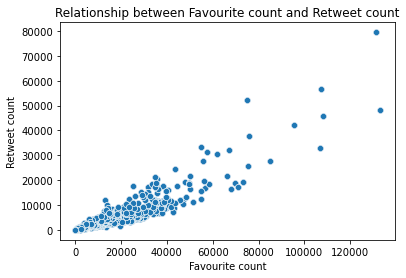

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.scatterplot(data=df, x="favorite_count", y="retweet_count")
plt.title("Relationship between Favourite count and Retweet count")
plt.xlabel("Favourite count")
plt.ylabel("Retweet count");


#### The above visual shows the relationship between retweet count and Favourite count. The graph above implies that there is a strong correlation between Retweet counts and Favourite counts, the higher the retweets the higher the favourite counts.